In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# Load datasets

In [2]:
customers_file = "data\Customers.csv"
products_file = "data\Products.csv"
transactions_file = "data\Transactions.csv"

In [3]:
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Convert TransactionDate to datetime format

In [4]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])


# Merge datasets for analysis

In [5]:
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")
merged_df = merged_df.merge(products_df, on="ProductID", how="left")


# Feature Engineering

# Aggregate customer-level data for clustering

In [6]:
customer_features = merged_df.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "ProductID": "nunique",  
    "TransactionID": "count"  
}).reset_index()

# Add demographic data

In [7]:
customer_features = customer_features.merge(customers_df, on="CustomerID", how="left")


# Scale numerical features

In [8]:
scaler = StandardScaler()
numerical_features = ["TotalValue", "Quantity", "ProductID", "TransactionID"]
customer_features_scaled = scaler.fit_transform(customer_features[numerical_features])


# Elbow Method for Optimal k

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

# Plot Elbow Curve

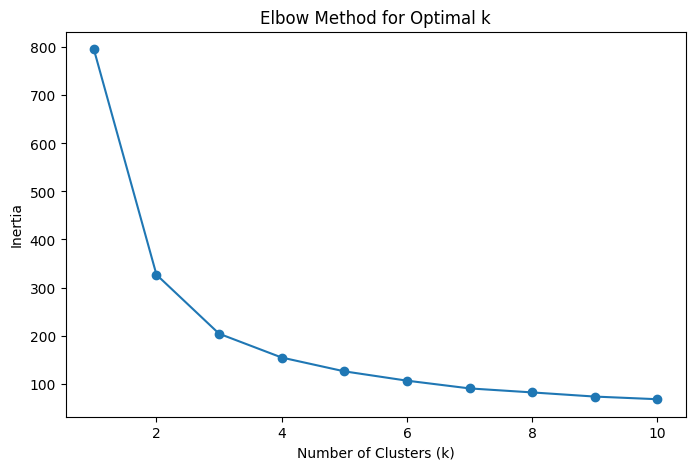

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


# Silhouette Score for Validation

In [11]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features_scaled)
    score = silhouette_score(customer_features_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

Silhouette Score for k=2: 0.4872353891698496
Silhouette Score for k=3: 0.4181003799717391
Silhouette Score for k=4: 0.3603280564186218
Silhouette Score for k=5: 0.3510884063280897
Silhouette Score for k=6: 0.35556882829867514


C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=7: 0.36469991948402986
Silhouette Score for k=8: 0.34138852592442287
Silhouette Score for k=9: 0.33935909468160685


C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=10: 0.34243323809493237


In [12]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(customer_features_scaled)


C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Clustering-based Recommendation System

In [13]:
def get_similarity_score(customer_vector, other_vector):
    """Calculate similarity score using cosine similarity."""
    return 1 - cosine(customer_vector, other_vector)


# Build a lookalike model

In [14]:
def recommend_lookalikes(customer_id, customer_features, top_n=3):
    """Recommend top N similar customers."""
    target_customer = customer_features[customer_features["CustomerID"] == customer_id]
    if target_customer.empty:
        return []

    target_vector = target_customer[numerical_features + ["Cluster"]].values[0]
    recommendations = []

    for _, row in customer_features.iterrows():
        if row["CustomerID"] != customer_id:
            other_vector = row[numerical_features + ["Cluster"]].values
            similarity_score = get_similarity_score(target_vector, other_vector)
            recommendations.append((row["CustomerID"], similarity_score))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]


# Generate recommendations for the first 20 customers

In [15]:
lookalike_map = {}
for customer_id in customers_df["CustomerID"].iloc[:20]:
    recommendations = recommend_lookalikes(customer_id, customer_features)
    lookalike_map[customer_id] = recommendations


# Save recommendations to Lookalike.csv

In [16]:
lookalike_data = []
for customer_id, recs in lookalike_map.items():
    for rec in recs:
        lookalike_data.append([customer_id, rec[0], rec[1]])

lookalike_df = pd.DataFrame(lookalike_data, columns=["CustomerID", "LookalikeCustomerID", "SimilarityScore"])
lookalike_df.to_csv("Lookalike.csv", index=False)


# Output results

In [18]:
print("Lookalike Recommendations:")
print(lookalike_df.head(3))

Lookalike Recommendations:
  CustomerID LookalikeCustomerID  SimilarityScore
0      C0001               C0056              1.0
1      C0001               C0011              1.0
2      C0001               C0193              1.0
